# The Office Data Analysis

In [1]:
import pandas as pd
import numpy as np

### Read in the Data

In [2]:
# Read CSV data into dataframe
file = 'the-office_lines.csv'

df = pd.read_csv(file)

In [3]:
# Show dataframe
display(df)

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1
...,...,...,...,...,...
58716,61302,Creed,It all seems so very arbitrary. I applied for...,9,23
58717,61303,Meredith,I just feel lucky that I got a chance to shar...,9,23
58718,61304,Phyllis,I’m happy that this was all filmed so I can r...,9,23
58719,61305,Jim,I sold paper at this company for 12 years. My...,9,23


In [4]:
!pip install wordcloud

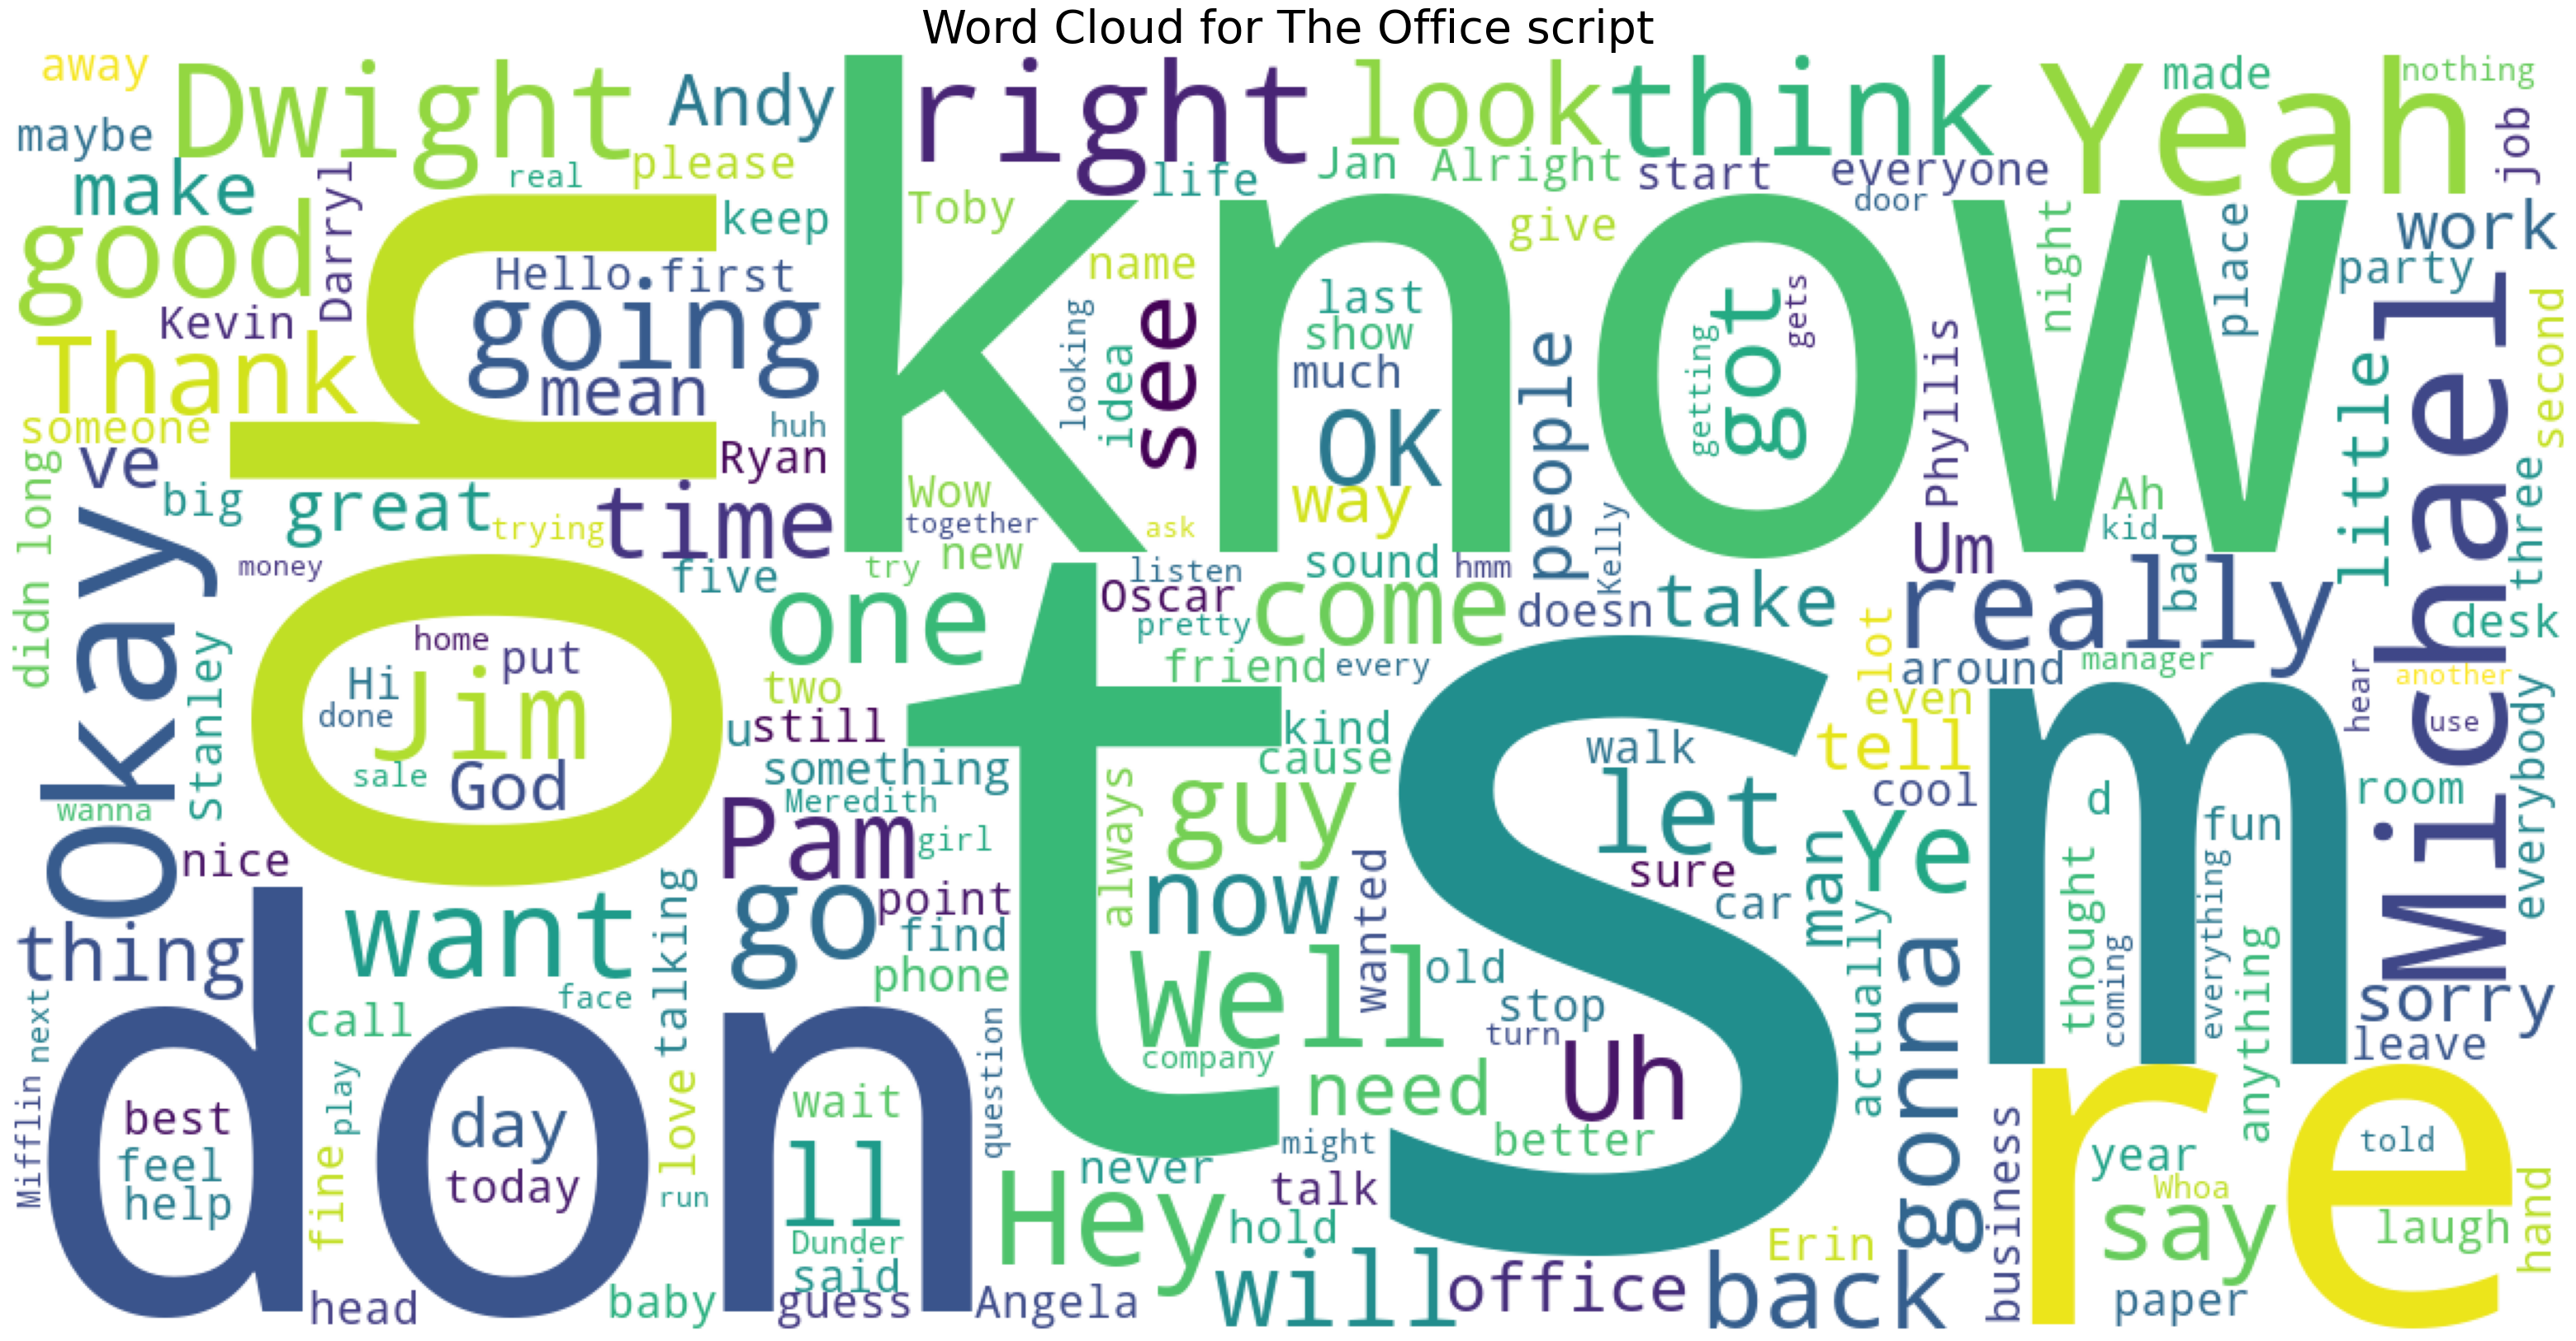

In [5]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt

plt.figure(figsize=(40,25))

text = df.Line.values
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=1200,
                          height=600
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Word Cloud for The Office script",fontsize=40)
plt.imshow(cloud)

In [6]:
#Split string in "Line" column into list
df['Line'] = df['Line'].str.split()

In [7]:
#Show type & length for 1st row in "Line" column
print(type(df.loc[0,'Line']))

print(len(df.loc[0,'Line']))

<class 'list'>
14


### Display the Dataframe

In [8]:
display(df)

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,"[All, right, Jim., Your, quarterlies, look, ve...",1,1
1,1,Jim,"[Oh,, I, told, you., I, couldn’t, close, it., ...",1,1
2,2,Michael,"[So, you’ve, come, to, the, master, for, guida...",1,1
3,3,Jim,"[Actually,, you, called, me, in, here,, but, y...",1,1
4,4,Michael,"[All, right., Well,, let, me, show, you, how, ...",1,1
...,...,...,...,...,...
58716,61302,Creed,"[It, all, seems, so, very, arbitrary., I, appl...",9,23
58717,61303,Meredith,"[I, just, feel, lucky, that, I, got, a, chance...",9,23
58718,61304,Phyllis,"[I’m, happy, that, this, was, all, filmed, so,...",9,23
58719,61305,Jim,"[I, sold, paper, at, this, company, for, 12, y...",9,23


In [9]:
#Get length of list in "Line" column & create new column ("Length")
df['Length'] = df['Line'].apply(lambda x: len(x))

In [10]:
#Show dataframe
display(df)

,Unnamed: 0,Character,Line,Season,Episode_Number,Length
0,0,Michael,"[All, right, Jim., Your, quarterlies, look, ve...",1,1,14
1,1,Jim,"[Oh,, I, told, you., I, couldn’t, close, it., ...",1,1,9
2,2,Michael,"[So, you’ve, come, to, the, master, for, guida...",1,1,14
3,3,Jim,"[Actually,, you, called, me, in, here,, but, y...",1,1,8
4,4,Michael,"[All, right., Well,, let, me, show, you, how, ...",1,1,10
...,...,...,...,...,...,...
58716,61302,Creed,"[It, all, seems, so, very, arbitrary., I, appl...",9,23,59
58717,61303,Meredith,"[I, just, feel, lucky, that, I, got, a, chance...",9,23,41
58718,61304,Phyllis,"[I’m, happy, that, this, was, all, filmed, so,...",9,23,31
58719,61305,Jim,"[I, sold, paper, at, this, company, for, 12, y...",9,23,46


### 1. Which character has the most lines in the TV show overall? 


In [11]:
#Get sum of 'Length' for each 'Character'
character_df = df.groupby(['Character'])['Length'].sum()

#Turn the sum output to dataframe
character_df = character_df.to_frame()

#Change column name
character_df.rename(columns={'Length':'Char_Line_Sum'}, inplace=True)

#Use reset_index() method to convert row index to column
character_df = character_df.reset_index()

#Sort "Char_Line_Sum" column values in desc order
character_df = character_df.sort_values('Char_Line_Sum', ascending=False)

In [12]:
# Show Character with most overall lines 
# Michael has the most lines overall at 172,551
display(character_df.iloc[:1])

,Character,Char_Line_Sum
450,Michael,172551


### 2. Which character has the most lines per season?

In [13]:
#Get sum of 'Length' for each 'Character' per 'Season'
season_df = df.groupby(['Character', 'Season'])['Length'].sum()

# Turn output to dataframe
season_df = season_df.to_frame()

#Change column name
season_df.rename(columns={'Length':'Season_Line_Sum'}, inplace=True)

# Used reset_index() method to convert row index to column
season_df = season_df.reset_index()

In [14]:
display(season_df)

,Character,Season,Season_Line_Sum
0,(Pam’S Mom) Heleen,6,2
1,3Rd Athlead Employee,9,7
2,4Th Athlead Employee,9,14
3,A.J.,5,35
4,Aaron Rodgers,9,39
...,...,...,...
1167,Zion,6,6
1168,“Angela”,7,19
1169,“Jim”,7,41
1170,“Jo”,7,64


In [15]:
# Get "Character" with the most lines per season ('Season_Line_Sum')
# Groupby 'Season' to get max in 'Season_Line_Sum' column & then get row index
season_sum_df = season_df.loc[season_df.groupby('Season')['Season_Line_Sum'].idxmax()]
season_sum_df #Show df

,Character,Season,Season_Line_Sum
682,Michael,1,12548
683,Michael,2,34503
684,Michael,3,29159
685,Michael,4,22009
686,Michael,5,27617
687,Michael,6,26062
688,Michael,7,20630
39,Andy,8,14339
305,Dwight,9,14332


### 3. Can the main characters be determined by the dialogue?

In [16]:
# Use Naive Baye ML Algorithm to classify the main character based on line.
# The main characters are 'Michael', 'Dwight', 'Jim', 'Pam', & 'Andy'

In [17]:
# Read CSV data into dataframe
file = 'the-office_lines.csv'

df2 = pd.read_csv(file)

In [18]:
display(df2)

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1
...,...,...,...,...,...
58716,61302,Creed,It all seems so very arbitrary. I applied for...,9,23
58717,61303,Meredith,I just feel lucky that I got a chance to shar...,9,23
58718,61304,Phyllis,I’m happy that this was all filmed so I can r...,9,23
58719,61305,Jim,I sold paper at this company for 12 years. My...,9,23


In [19]:
df2.shape

(58721, 5)

In [20]:
#Count of unique characters on the show
len(set(df2['Character'])) 

780

In [21]:
# Filter df for only main characters on the show
df2 = df2.loc[df2['Character'].isin(['Michael', 'Dwight', 'Jim', 'Pam', 'Andy'])]

In [22]:
#Count of unique main characters on the show
len(set(df2['Character']))

5

In [23]:
df2.shape

(35062, 5)

In [24]:
#Define training output variable
y = df2['Character']

In [25]:
# Load count vectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vrizer = CountVectorizer()

X = vrizer.fit_transform(df2['Line']) #Input training variable

# Get dimension, 
print(X.shape) #there are 1956 comments & 4454 words

(35062, 16884)


In [26]:
# Create variable of all unique words
tokens = vrizer.get_feature_names_out()

# Show unique words
np.random.choice(tokens, 20)

array(['marginalized', 'bearer', 'perky', 'orderly', 'unicorn', 'rolf',
       'hornet', 'piet', 'cheater', 'aaaall', 'vol', 'pfn', 'slings',
       'battering', 'ceiling', 'who', 'manheim', 'launching', 'lane',
       'exists'], dtype=object)

In [27]:
# Show first 20 words
tokens[:15]

array(['00', '000', '01', '017', '03', '05', '07', '10', '100', '1000',
       '100k', '100th', '101', '102', '103'], dtype=object)

In [28]:
# Train/test split with 80% of data is for training & 20% for testing
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y, test_size=.20)

print(Xt.shape) #dimension of training data
print(Xv.shape) #dimension of testing data

(28049, 16884)
(7013, 16884)


In [29]:
# Do MultinomialNB model
from sklearn.naive_bayes import MultinomialNB # Used for counts

mnb_model = MultinomialNB(alpha=1.1) # Apply alpha for smoothing effect

# fit model (train model)
mnb_model.fit(Xt, yt) 

# Get predictions
yhat = mnb_model.predict(Xv)

# Get accuracy
mnb_model.score(Xv, yv) #Accuracy is 39.54%

0.38927705689433906

In [30]:
#Count the predicted occurences of each character
print(np.unique(yhat, return_counts=True))

#Count the actual occurences of each character
print(np.unique(yv, return_counts=True))

(array(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'], dtype='<U7'), array([ 175,  883,  716, 4948,  291], dtype=int64))
(array(['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'], dtype=object), array([ 777, 1495, 1328, 2385, 1028], dtype=int64))


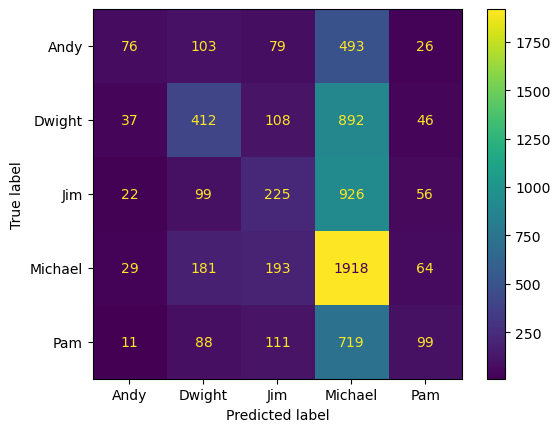

In [31]:
# Plot confusion matrix of predicted results vs actual values
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(yv, yhat)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=['Andy', 'Dwight', 'Jim', 'Michael', 'Pam'])

cm_display.plot()
plt.show()

Text(0.5, 1.0, 'Accuracy vs. Alpha')

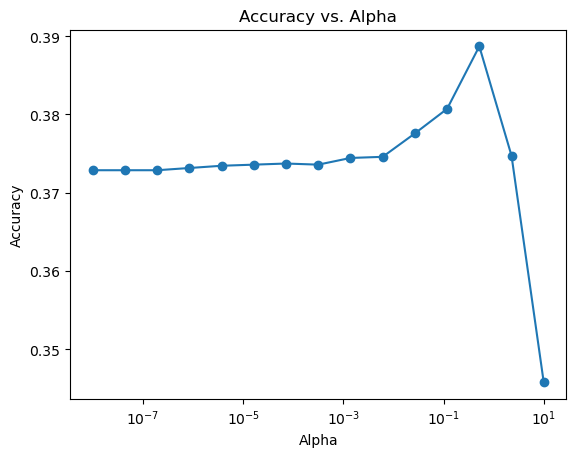

In [32]:
# Plot alphas to find optimal alpha for MutinomialNB model
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-8,1,15)
scores = []
for alpha in alphas:
    m = MultinomialNB(alpha=alpha)
    m.fit(Xt, yt)
    scores.append(m.score(Xv, yv)) 
    
plt.plot(alphas, scores, marker="o")
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Alpha")

### 4. What is the overall tone of the TV show in terms of its script?

In [33]:
!pip install flair
!pip install numpy

In [34]:
import flair

# download and initialize sentiment model
model = flair.models.TextClassifier.load('en-sentiment')

In [35]:
# Load 'Line' column data into string
text = ' '.join(df2['Line'])

# Pack string into sentence object
sentence = flair.data.Sentence(text)

# Input sentence object into model
model.predict(sentence)

In [36]:
# show overall sentiment score and label
print(sentence.get_labels()[0].score)
print(sentence.get_labels()[0].value)

0.6571989059448242
POSITIVE


### 5. Which characters have longer lines and which characters have shorter lines?

In [37]:
# remove rows with short lines in the line_text column
new_df = df[df['Line'].str.len() > 3]
display(new_df)

,Unnamed: 0,Character,Line,Season,Episode_Number,Length
0,0,Michael,"[All, right, Jim., Your, quarterlies, look, ve...",1,1,14
1,1,Jim,"[Oh,, I, told, you., I, couldn’t, close, it., ...",1,1,9
2,2,Michael,"[So, you’ve, come, to, the, master, for, guida...",1,1,14
3,3,Jim,"[Actually,, you, called, me, in, here,, but, y...",1,1,8
4,4,Michael,"[All, right., Well,, let, me, show, you, how, ...",1,1,10
...,...,...,...,...,...,...
58716,61302,Creed,"[It, all, seems, so, very, arbitrary., I, appl...",9,23,59
58717,61303,Meredith,"[I, just, feel, lucky, that, I, got, a, chance...",9,23,41
58718,61304,Phyllis,"[I’m, happy, that, this, was, all, filmed, so,...",9,23,31
58719,61305,Jim,"[I, sold, paper, at, this, company, for, 12, y...",9,23,46


In [38]:
# List out all unique speakers in the dataset
new_df.Character.unique()[:25]

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Todd Packer', 'Phyllis',
       'Oscar', 'Angela', 'Kevin', 'Ryan', 'Stanley', 'Man', 'Roy',
       'Documentary Crew Member', 'Mr. Brown', 'Toby', 'Kelly',
       'Meredith', 'Travel Agent', 'Man On Phone', 'Everybody', 'Darryl',
       'Warehouse Worker', 'Lonny'], dtype=object)

In [39]:
# Number of unique speakers
len(new_df.Character.unique())

683

In [40]:
# Count of how many lines each character has
lines = new_df.groupby(['Character']).size()
most_lines = lines.sort_values(ascending=False).head(10)
least_lines = lines.sort_values(ascending=True).head(10)

In [41]:
# Show the Top 10 characters with the most lines, in descending order
print("Top 10 characters with the most lines:")
print(most_lines)

# Show the Bottom 10 characters with the least number of lines, in ascending order
print("\nBottom 10 characters with the least number of lines:")
print(least_lines)

Top 10 characters with the most lines:
Character
Michael    9207
Dwight     5681
Jim        4601
Pam        3651
Andy       3045
Kevin      1188
Angela     1175
Oscar      1073
Erin       1047
Ryan        977
dtype: int64

Bottom 10 characters with the least number of lines:
Character
3Rd Athlead Employee    1
Meredith & Kelly        1
Member                  1
Meemaw                  1
Mee-Maw                 1
Man In Video            1
Man 3                   1
Man 1                   1
Male Voice              1
Meredith’S Vet          1
dtype: int64


### 6. What are the top phrases used by the main character?

In [42]:
# The main characters are 'Michael', 'Dwight', 'Jim', 'Pam', & 'Andy'

In [43]:
df_main_character = df2[df2['Character'] == 'Michael']

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

c_vec = CountVectorizer(ngram_range=(4,5))

# input to fit_transform() should be an iterable with strings
ngrams = c_vec.fit_transform(df_main_character['Line'].tolist())

# needs to happen after fit_transform()
vocab = c_vec.vocabulary_

count_values = ngrams.toarray().sum(axis=0)

In [45]:
# output n-grams
# show only the top 15 phrases
count = 0
top_num = 15
print('Freq|Phrase')
for ng_count, ng_text in sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True):
    print(ng_count, ng_text)
    count += 1
    if count > top_num:
        break

Freq|Phrase
112 no no no no
47 no no no no no
39 we re going to
37 we are going to
35 okay you know what
33 you know what you
32 what are you doing
27 and you know what
25 the end of the
25 all right all right
22 that what she said
22 thank you very much
22 in the conference room
21 you re going to
20 well you know what
20 good to see you
